Name : Suraj Meshram

# ASSIGNMENT: 
 Topic- the Emissions/process data from 
Gas Turbine (GT) system

# 0.0 Preprocess The Data

0.1 Import the Libraries 

In [1]:
import  numpy as np ,pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os 
os.chdir("C:\workfile")

0.2 Import the Dataset

In [3]:
emmision_df = pd.read_csv("gt_2013.csv")
emmision_df.head()


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,9.3779,1020.1,90.262,2.3927,19.166,1043.6,541.16,110.16,10.564,9.3472,98.741
1,9.2985,1019.9,89.934,2.3732,19.119,1039.9,538.94,109.23,10.572,11.0160,104.290
2,9.1337,1019.8,89.868,2.3854,19.178,1041.0,539.47,109.62,10.543,10.7500,103.470
3,8.9715,1019.3,89.490,2.3825,19.180,1037.1,536.89,108.88,10.458,12.2870,108.810
4,9.0157,1019.1,89.099,2.4044,19.206,1043.5,541.25,110.09,10.464,9.8229,100.020


In [4]:
print("The dataset has {} rows and {} columns".format(emmision_df.shape[0],emmision_df.shape[1]))
print("-------------------------------------------------")
print(emmision_df.dtypes)       #to check out the data type of each column in the dataset.

The dataset has 7152 rows and 11 columns
-------------------------------------------------
AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object


 we see that every data has contain float means its numeric data 

In [5]:
emmision_df.describe()  # to check which compute the basic statstics for all contineous values

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7152.00000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000
mean,17.60262,1011.999607,80.461624,3.695958,25.105097,1081.569463,545.780885,132.168342,11.971586,2.723031,70.007899
std,6.86289,6.290065,14.125390,0.805829,4.350711,17.385147,7.358935,16.348156,1.132159,2.363913,12.048249
min,0.28985,989.380000,27.504000,2.329500,18.104000,1022.100000,518.320000,101.480000,9.875400,0.005033,43.198000
25%,12.04875,1008.400000,71.493500,3.100350,21.385000,1065.975000,543.745000,118.005000,11.001250,1.257975,62.269000
50%,17.20450,1011.800000,84.002000,3.627850,24.852500,1087.300000,549.900000,133.570000,11.956000,1.782700,68.651000
75%,23.16400,1016.000000,91.579000,4.156825,26.385750,1094.400000,550.030000,135.520000,12.319250,3.591225,76.001500
max,33.87300,1029.700000,100.190000,6.977900,36.950000,1100.500000,550.530000,172.960000,14.867000,35.045000,119.910000


0.3 Check the Missing Data

In [6]:
# to detect if there are any missing values which are being represented by either '?' or blank cell. 
flag = False
for i in emmision_df.columns.tolist():
    if  "?" in emmision_df[i].tolist () or "" in emmision_df[i].tolist() :
        flag=True
        
print(flag)

False


In [7]:
# to check if there are 'NaN'or null values in the cells.
emmision_df.isnull().sum().sort_values(ascending=False)/emmision_df.shape[0]
#print(emmision_df.nunique(axis=1))

AT      0.0
AP      0.0
AH      0.0
AFDP    0.0
GTEP    0.0
TIT     0.0
TAT     0.0
TEY     0.0
CDP     0.0
CO      0.0
NOX     0.0
dtype: float64

In [8]:
col_names=list(emmision_df)
#col_names
num_missing = (emmision_df[col_names[:-2]] == 0).sum()
num_missing

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
dtype: int64

In [9]:
emmision_df.duplicated().sum()

0

As we can see, we have got no result of "?" ,0 or 'blank' with 'True' in it also there is no any null value and duplicates in the data Therefore our Data is clean.

0.4 Check the Outlier

we detect the outliers in the dataset.
For detecting the outliers we can use :
1. Box Plot
2. Scatter plot
3. IQR Method

In [10]:
col_names

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

([<matplotlib.axis.XTick at 0x24b44c69000>,
 [Text(1, 0, 'CO'), Text(2, 0, 'NOX')])

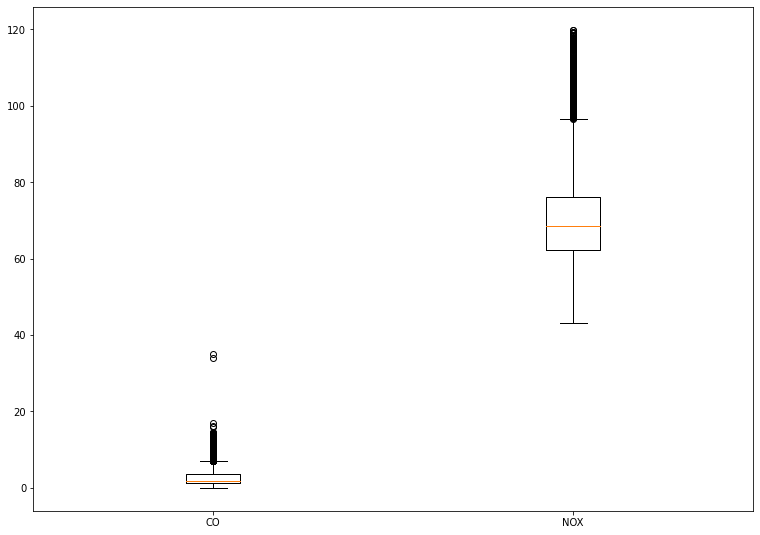

In [11]:
fig = plt.figure(figsize =(10, 7))

data = [emmision_df["CO"],emmision_df["NOX"]]
ax =fig.add_axes([0,0,1,1])
ax.boxplot(data)
plt.xticks([1, 2], ["CO","NOX"])



(-5.0, 110.0)

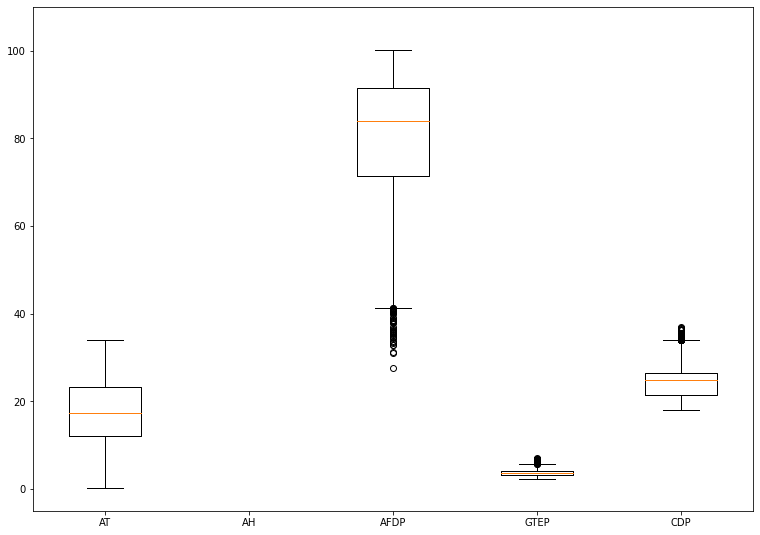

In [12]:
data1 = [emmision_df['AT'],emmision_df['AP'],emmision_df["AH"],emmision_df['AFDP'],emmision_df["GTEP"]]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot(data1)
plt.xticks([1, 2, 3,4,5], ['AT', 'AH', 'AFDP', 'GTEP',"CDP"])

plt.ylim(-5,110)


(100.0, 1200.0)

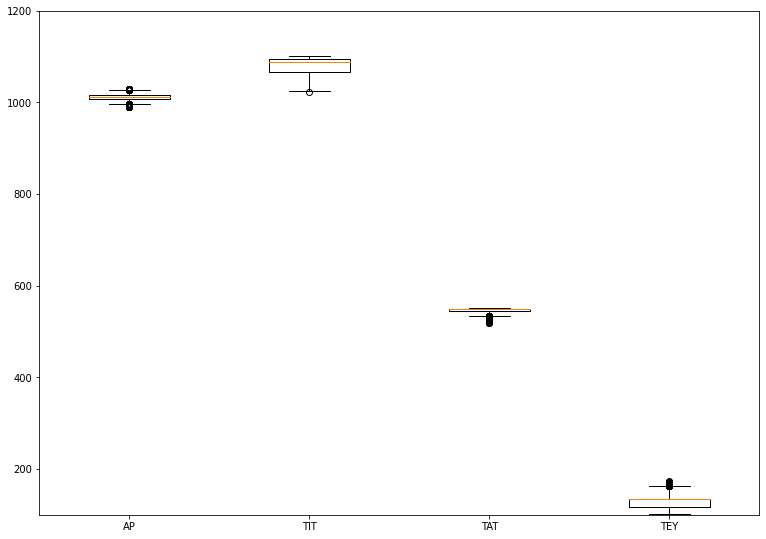

In [14]:
data1 = [emmision_df['AP'],emmision_df['TIT'],emmision_df["TAT"],emmision_df['TEY']]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot(data1)
plt.xticks([1, 2, 3,4], ['AP', 'TIT', 'TAT', 'TEY'])

plt.ylim(100,1200)


In [15]:
Q1 = np.percentile(emmision_df,25,interpolation='midpoint')
Q2 =np .percentile(emmision_df,50,interpolation='midpoint')
Q3 =np .percentile(emmision_df,75,interpolation='midpoint')

IQR = Q3 - Q1

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

outlier_CO = emmision_df['CO'] >= up_lim
outlier_NOX = emmision_df['NOX'] >= up_lim

print(np.where(outlier_CO))
print(np.where(outlier_NOX))



(array([], dtype=int64),)
(array([], dtype=int64),)


C:\Users\Suraj\AppData\Local\Temp\ipykernel_9312\3174765929.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(emmision_df,25,interpolation='midpoint')
C:\Users\Suraj\AppData\Local\Temp\ipykernel_9312\3174765929.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 =np .percentile(emmision_df,50,interpolation='midpoint')
C:\Users\Suraj\AppData\Local\Temp\ipykernel_9312\3174765929.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoin

No outlier

# 1.0 Exploratory Data Analysis & Visualizations

1.1 Using Pairplot to check relationship the variable 

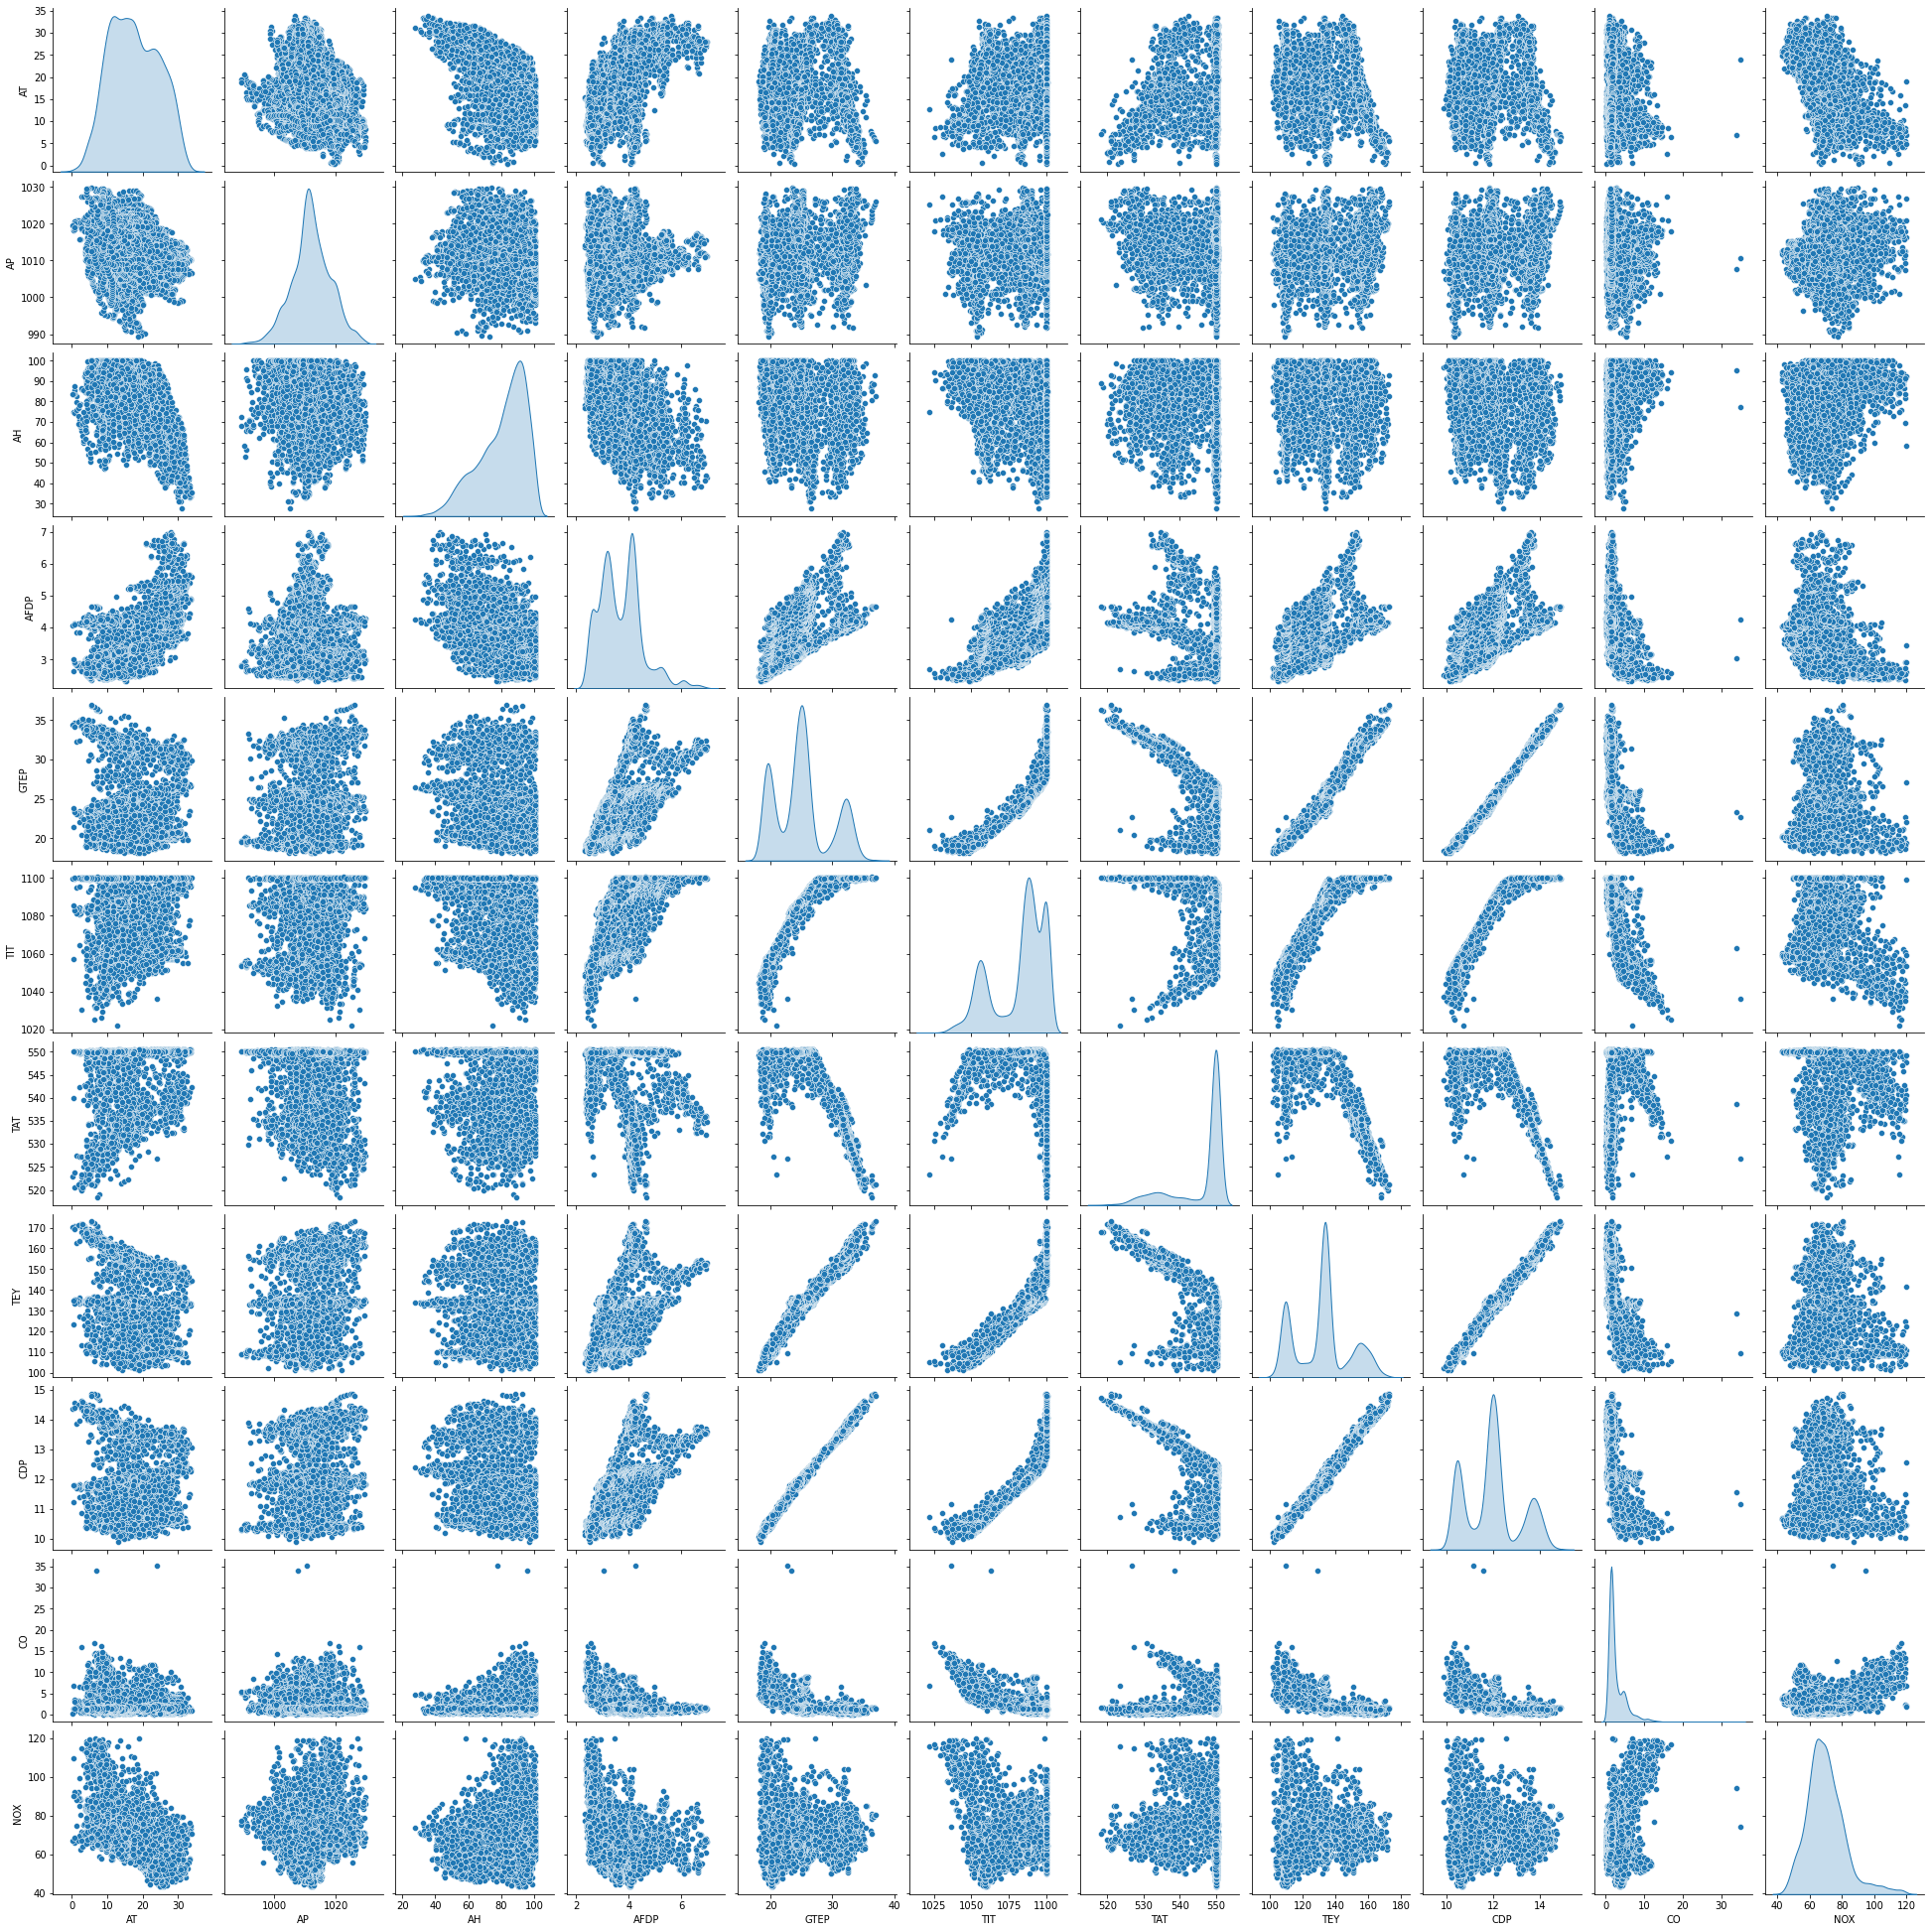

In [16]:
sns.pairplot(emmision_df,diag_kind='kde')

we see ..
NOX follows kind a normal Distribution shape.


1.2 Co-relation of variable

In [17]:
emmision_df.corr()


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.224382,-0.598627,0.583369,-0.043098,0.112788,0.332060,-0.165419,-0.069336,-0.157783,-0.581687
AP,-0.224382,1.000000,-0.019056,0.022045,0.207948,0.163417,-0.236419,0.226761,0.229323,-0.109782,0.096800
AH,-0.598627,-0.019056,1.000000,-0.477844,-0.188930,-0.251603,0.005067,-0.115436,-0.181624,0.247851,0.182527
AFDP,0.583369,0.022045,-0.477844,1.000000,0.624854,0.644273,-0.326829,0.540439,0.612137,-0.479581,-0.386677
GTEP,-0.043098,0.207948,-0.188930,0.624854,1.000000,0.896211,-0.770147,0.981677,0.996149,-0.642176,-0.024444
TIT,0.112788,0.163417,-0.251603,0.644273,0.896211,1.000000,-0.415352,0.917162,0.912384,-0.806942,-0.122998
TAT,0.332060,-0.236419,0.005067,-0.326829,-0.770147,-0.415352,1.000000,-0.722024,-0.748264,0.155655,-0.179357
TEY,-0.165419,0.226761,-0.115436,0.540439,0.981677,0.917162,-0.722024,1.000000,0.990425,-0.668985,0.040766
CDP,-0.069336,0.229323,-0.181624,0.612137,0.996149,0.912384,-0.748264,0.990425,1.000000,-0.655751,-0.005352
CO,-0.157783,-0.109782,0.247851,-0.479581,-0.642176,-0.806942,0.155655,-0.668985,-0.655751,1.000000,0.366217


<AxesSubplot:>

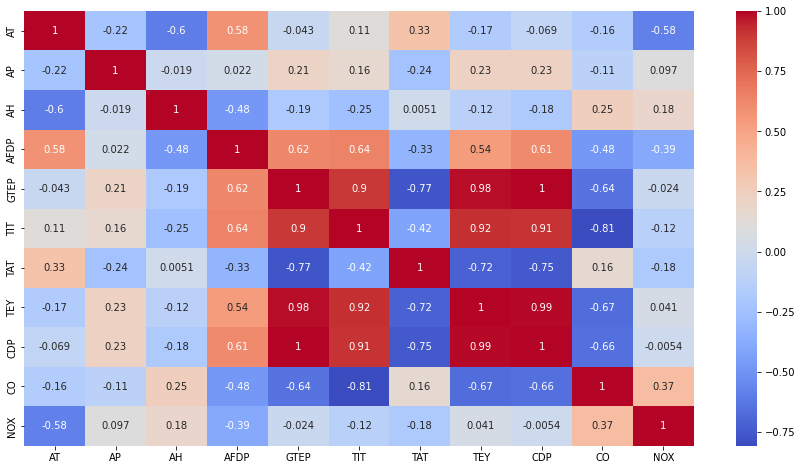

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(emmision_df.corr(),cmap="coolwarm",annot=True)

# 2.0 Multi-Output Regression Models

Now that we have the important features we can perform Multi_Output Regression on that data. We will use train_test_split method to split our data in 75% training data and 25% test data.But before that we will create a new dataframe which contains only the features x_data and y_data which contains two the target variable.

2.1 Dependent and Independent variable

In [19]:
x_data = emmision_df.iloc[:,:-2]
#x_data
y_data = emmision_df[["CO","NOX"]]
#y_data


In [20]:
y_data.iloc[:,0]

0        9.3472
1       11.0160
2       10.7500
3       12.2870
4        9.8229
         ...   
7147     1.2538
7148     1.0808
7149     1.0472
7150     1.0875
7151     1.1337
Name: CO, Length: 7152, dtype: float64

2.2 Split the dataset into Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.25,random_state=42)

In [22]:
print(X_train)
print("---------------------------")
print(y_test)

           AT       AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP
1872  11.5510  1013.70  86.936  3.8945  29.854  1095.4  537.03  151.23  13.241
1835   7.6329  1001.60  85.753  2.5127  19.128  1042.1  541.77  109.32  10.427
4055  21.6350  1005.00  76.075  4.0705  24.881  1088.1  550.09  132.80  11.999
1919  13.6650   998.91  98.672  4.2507  31.866  1100.0  534.02  157.01  13.587
5050  27.4880  1010.90  64.044  5.0612  26.348  1095.4  549.76  135.28  12.311
...       ...      ...     ...     ...     ...     ...     ...     ...     ...
3772  20.6470  1013.90  93.202  3.1689  19.409  1055.8  549.95  108.97  10.414
5191  29.9900  1011.90  60.760  6.0109  30.565  1099.9  538.73  148.21  13.301
5226  21.8750  1011.20  95.741  4.0773  19.834  1057.7  549.96  109.75  10.513
5390  24.9800  1008.90  91.574  5.2771  25.978  1092.1  549.99  134.10  12.189
860   14.4440  1001.90  97.529  2.9196  22.769  1074.2  549.88  125.55  11.320

[5364 rows x 9 columns]
---------------------------

2.3 Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [24]:
print(X_train)
print("---------------------------")
print(y_test)

[[-0.88980782  0.27848719  0.46172013 ... -1.19738411  1.17244341
   1.1260355 ]
 [-1.45944148 -1.64992888  0.37820492 ... -0.54975064 -1.39497242
  -1.36316556]
 [ 0.57625631 -1.1080599  -0.30502437 ...  0.58702374  0.04341755
   0.02739026]
 ...
 [ 0.61114876 -0.11994588  1.08331901 ...  0.56926164 -1.36863053
  -1.28709189]
 [ 1.06256973 -0.48650431  0.78914496 ...  0.57336059  0.12305584
   0.19545998]
 [-0.4692085  -1.60211691  1.20954488 ...  0.55833112 -0.40071904
  -0.57323786]]
---------------------------
           CO      NOX
6041   1.1049   81.997
3685   7.2757   60.454
6216   2.4217   65.545
2516  11.0500  100.870
3268   1.3293   71.800
...       ...      ...
1310   1.7029   77.409
6431   1.1828   64.463
4772   2.2606   60.273
5425   2.3216   74.116
2453   1.3789   73.456

[1788 rows x 2 columns]


# 3.0 Fitting Linear Regression Model to the Training Set

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

yhat_test = lr.predict(X_test)
yhat_train = lr.predict(X_train)



print(yhat_test[:5])  # y_hatTest predication

[[-0.48558394 64.14900159]
 [ 2.24220936 64.17525237]
 [ 2.61824356 67.89023116]
 [ 8.29028608 78.64833777]
 [ 0.97390058 62.92413302]]


Now, we have yhat_test this is our array of CO and NOx prediction

3.1 Find Intercept And Slope

In [26]:
# finding intercept and coeefficeint of each features
lr.intercept_      # Beta_naut
lr.coef_           # Beta_1 , Beta_2 ....Beta_9

coeff_CO =  pd.DataFrame(lr.coef_[0],index=x_data.columns,columns=['coeffiecintOF_CO'])

coeff_NOX =  pd.DataFrame(lr.coef_[1],index=x_data.columns,columns=['coeffiecintOF_NOX'])



In [27]:
data=pd.concat([coeff_CO,coeff_NOX],axis=1)
data

,coeffiecintOF_CO,coeffiecintOF_NOX
AT,0.474438,-14.827805
AP,-0.098817,-1.599383
AH,0.258317,-3.724036
AFDP,-0.024943,-0.725617
GTEP,-5.952363,-3.461453
TIT,0.278104,14.711388
TAT,-2.518002,-3.984927
TEY,-0.249301,-43.553020
CDP,2.586461,29.286270


3.2 Evaluation Metrics

evaluate the predicted values with the actual values using Mean Squared Error and accuracy with the r square method.

In [28]:
from sklearn.metrics import r2_score , mean_squared_error

r2_test_CO = r2_score(y_test.iloc[:,0],yhat_test[:,0])
r2_test_NOX = r2_score(y_test.iloc[:,1],yhat_test[:,1])

#r2_train = r2_score(y_train,yhat1_train)
MSE_CO = mean_squared_error(y_test.iloc[:,0],yhat_test[:,0])
MSE_NOX = mean_squared_error(y_test.iloc[:,1],yhat_test[:,1])

In [29]:
print("Test Accuracy for CO : ",r2_test_CO)
print("Test Accuracy for NOX : ",r2_test_NOX)
#print("Training Accuracy : ",r2_train)
print("Mean Squared Error for CO : ",MSE_CO)
print("Mean Squared Error for NOX : ",MSE_NOX)

Test Accuracy for CO :  0.7296689616158056
Test Accuracy for NOX :  0.43987463660957715
Mean Squared Error for CO :  1.3597625609196047
Mean Squared Error for NOX :  79.78780102497436


 must be RMSE/MAE=0 and R2 score = 1

# 4.0 Visualization

4.1 Distribution Plot

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

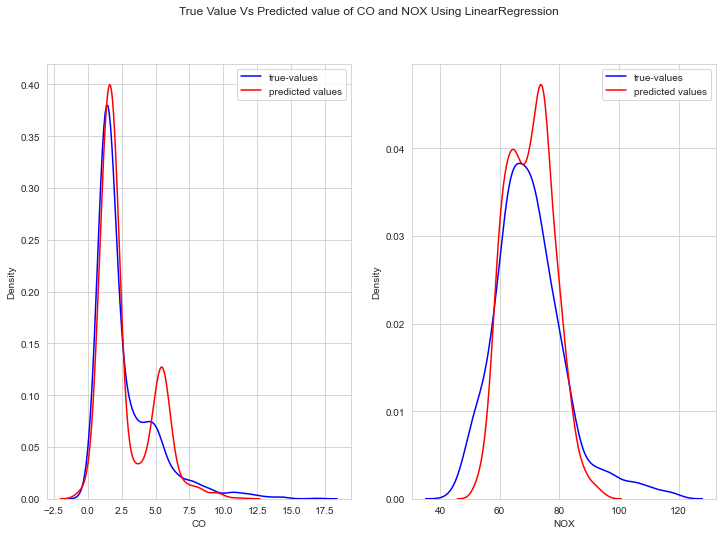

In [30]:
sns.set_style("whitegrid")
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))
sns.distplot(y_test.iloc[:,0], color = 'b', label="true-values", hist=False, ax = ax1)
sns.distplot(yhat_test[:,0], color='r', label="predicted values", hist= False , ax = ax1)
ax1.legend()

sns.distplot(y_test.iloc[:,1], color = 'b', label="true-values", hist=False, ax= ax2)
sns.distplot(yhat_test[:,1], color='r', label="predicted values", hist= False , ax = ax2)
plt.suptitle("True Value Vs Predicted value of CO and NOX Using LinearRegression ")
ax2.legend()

As we can see in the left plot,the predictions made by our modal on the test data of CO is not accurate around the range 1-2 and 4-6 as it varies by a greater extent. similarly right plot the test data of NOX also not accurate around 60-70.

4.1 Histogram and Scatter Plot with regression Line

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Residual distribution plot and regression plot of CO Using LinearRegression ')

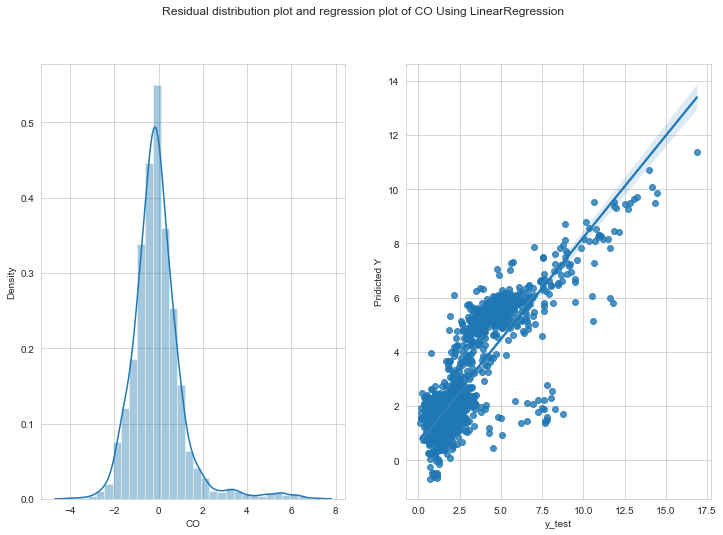

In [31]:
# Residual Histogram of CO emmision and regression plot of Co
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))

sns.distplot(y_test.iloc[:,0]-yhat_test[:,0],bins=30,ax=ax1)

sns.regplot(y_test.iloc[:,0],yhat_test[:,0],ax=ax2)
plt.xlabel('y_test')
plt.ylabel('Pridicted Y')
plt.suptitle("Residual distribution plot and regression plot of CO Using LinearRegression ")


C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Residual distribution plot and regression plot of NOX Using LinearRegression ')

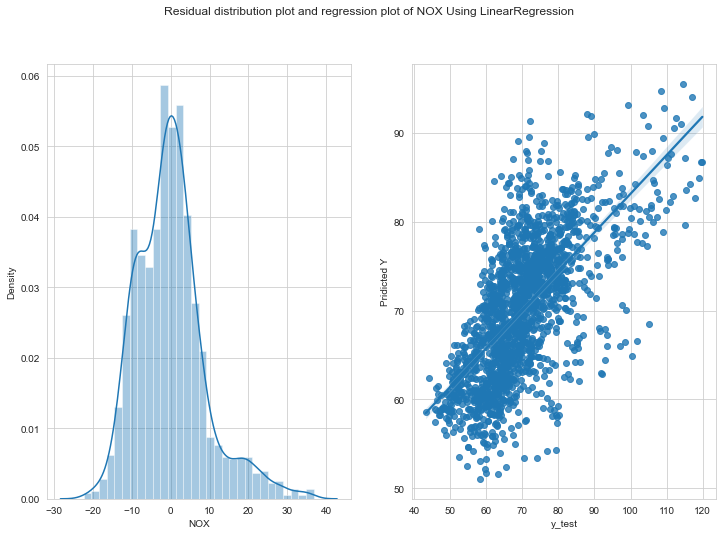

In [32]:
# Residual Histogram of NOX emmision and and regression plot of Co
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))
sns.distplot(y_test.iloc[:,1]-yhat_test[:,1],bins=30 ,ax=ax1)

sns.regplot(y_test.iloc[:,1],yhat_test[:,1],ax=ax2)
plt.xlabel('y_test')
plt.ylabel('Pridicted Y')
plt.suptitle("Residual distribution plot and regression plot of NOX Using LinearRegression ")


On Left they’re pretty symmetrically distributed ..The model for the chart on the far right is not strong relationships,the model’s predictions aren’t very good at all.

4.2 Residual Plot

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Residual Plot For CO & NOX')

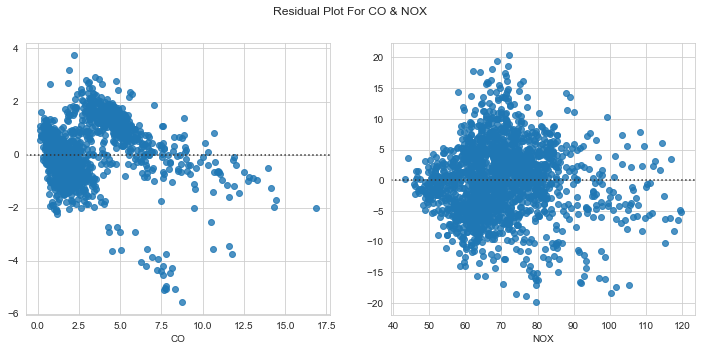

In [33]:
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))

sns.residplot(y_test.iloc[:,0],yhat_test[:,0],ax=ax1)


sns.residplot(y_test.iloc[:,1],yhat_test[:,1],ax=ax2)
plt.suptitle("Residual Plot For CO & NOX")

In this residual plot,The data points are above the residual=0 line so we conclude that a linear model is not a right fit for the data.

4.3 Conclusion

So LinearRegression will not give better Predication with maximum error rate between true value and Pridicated values.
that'way i am try onther model for better predication!!

Testing Out alternative model such as Random Forest Regressor to compare the results of the model Build 

# 5.0 RandomForestRegressor

5.1 Import Regressor Class 

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

5.2 Fit Model

In [35]:
#Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor()
#transforming target variable through quantile transformer
ttr = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
ttr.fit(X_train, y_train)

yhat1_test = ttr.predict(X_test)

5.3 Predicting the Result

In [36]:
yhat1_test = ttr.predict(X_test)
yhat1_test[:5]

array([[  1.11133558,  79.87237354],
       [  4.1793549 ,  63.4031105 ],
       [  1.93019535,  72.20263343],
       [ 11.07057452, 103.3418218 ],
       [  1.57993413,  69.3209165 ]])

5.4  Evaluation Metrics

evaluate the predicted values with the actual values using Mean Squared Error and accuracy with the r square method.

In [37]:
r2_test_CO = r2_score(y_test.iloc[:,0],yhat1_test[:,0])
r2_test_NOX = r2_score(y_test.iloc[:,1],yhat1_test[:,1])
MSE_CO = mean_squared_error(y_test.iloc[:,0],yhat1_test[:,0])
MSE_NOX = mean_squared_error(y_test.iloc[:,1],yhat1_test[:,1])

In [38]:
print("Test Accuracy for CO : ",r2_test_CO)
print("Test Accuracy for NOX : ",r2_test_NOX)
#print("Training Accuracy : ",r2_train)
print("Mean Squared Error for CO : ",MSE_CO)
print("Mean Squared Error for NOX : ",MSE_NOX)

Test Accuracy for CO :  0.8842955382855905
Test Accuracy for NOX :  0.859041573128891
Mean Squared Error for CO :  0.5819923457957188
Mean Squared Error for NOX :  20.079010255684747


6.0 Visulization 

6.1 Distribution Plot

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

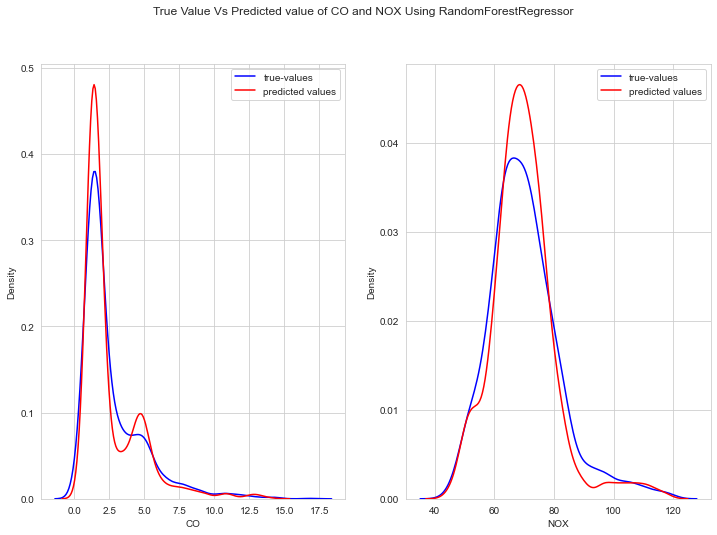

In [39]:
sns.set_style("whitegrid")
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))
sns.distplot(y_test.iloc[:,0], color = 'b', label="true-values", hist=False, ax = ax1)
sns.distplot(yhat1_test[:,0], color='r', label="predicted values", hist= False , ax = ax1)
ax1.legend()

sns.distplot(y_test.iloc[:,1], color = 'b', label="true-values", hist=False, ax= ax2)
sns.distplot(yhat1_test[:,1], color='r', label="predicted values", hist= False , ax = ax2)
plt.suptitle("True Value Vs Predicted value of CO and NOX Using RandomForestRegressor ")
ax2.legend()

When RandomForestRegressor model give more accuracy as compared to LinearRegession As we can see they are much lower this time .It fits better than our baseline .The gap between the two line has reduced!!

6.1 Histogram and scatter plot with reg. line

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Residual distribution plot and regression plot of CO Using RandomForestRegressor ')

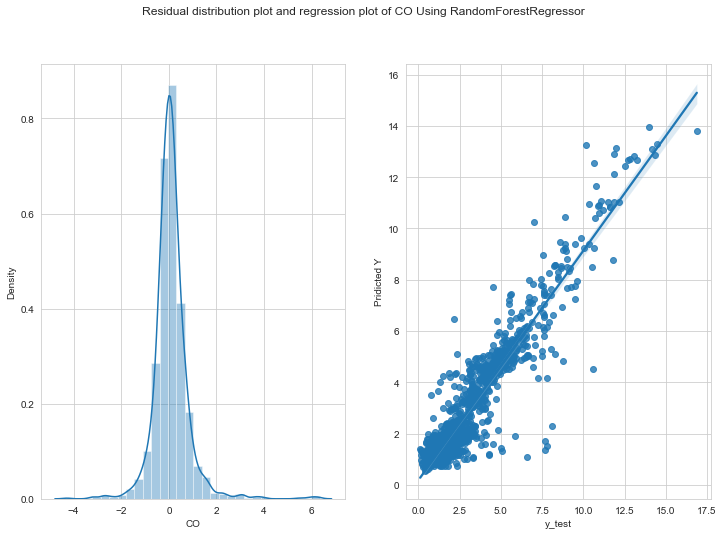

In [40]:
# Residual Histogram of CO emmision and regression plot of Co
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))

sns.distplot(y_test.iloc[:,0]-yhat1_test[:,0],bins=30,ax=ax1)

sns.regplot(y_test.iloc[:,0],yhat1_test[:,0],ax=ax2)
plt.xlabel('y_test')
plt.ylabel('Pridicted Y')
plt.suptitle("Residual distribution plot and regression plot of CO Using RandomForestRegressor ")


C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Residual distribution plot and regression plot of NOX Using RandomForestRegressor ')

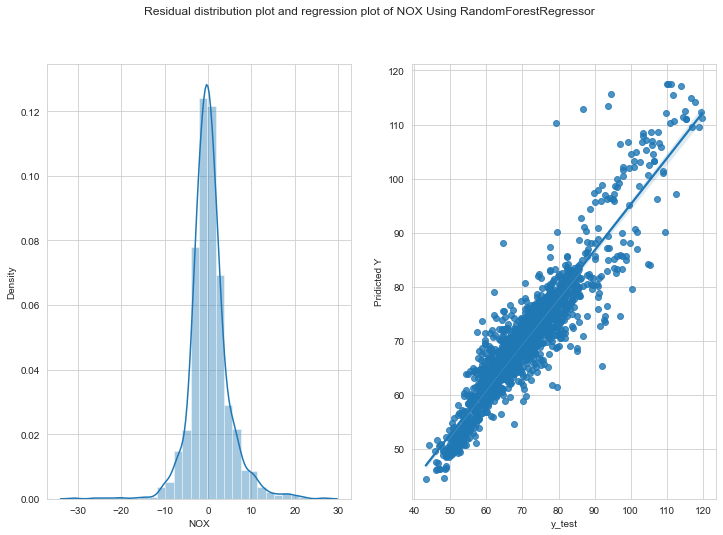

In [41]:
# Residual Histogram of NOX emmision and and regression plot of Co
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))
sns.distplot(y_test.iloc[:,1]-yhat1_test[:,1],bins=30 ,ax=ax1)

sns.regplot(y_test.iloc[:,1],yhat1_test[:,1],ax=ax2)
plt.xlabel('y_test')
plt.ylabel('Pridicted Y')
plt.suptitle("Residual distribution plot and regression plot of NOX Using RandomForestRegressor ")


Left plot show follows Normal Distribution and they’re pretty symmetrically distributed .
The model for the chart on the left is very accurate; there’s a strong correlation between the model’s predictions and its actual results

6.2 Residual Plot

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Residual Plot For CO & NOX')

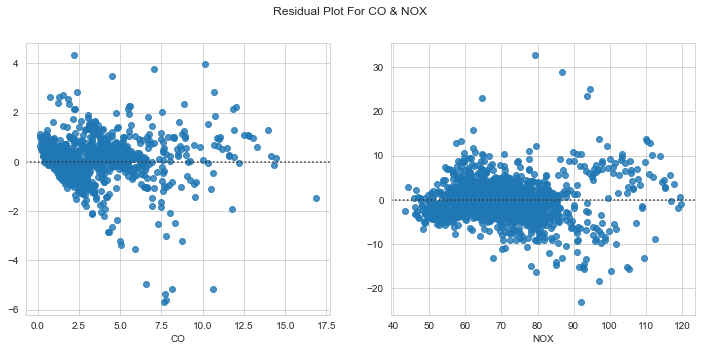

In [42]:
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))

sns.residplot(y_test.iloc[:,0],yhat1_test[:,0],ax=ax1)


sns.residplot(y_test.iloc[:,1],yhat1_test[:,1],ax=ax2)
plt.suptitle("Residual Plot For CO & NOX")

In the Plot, We see that residuals tend to concentrate around the x-axis,
In this residual plot, the points are scattered randomly around the residual=0 line. We can conclude that a linear model is appropriate for modeling this data.

6.4 Conclusion

The accuracy of our model is 88%  for CO and 86% for NOX.. its MSE has reduced to 0.5858 for CO and 19.91 for NOX 
so we can say that it perform better!!!

# 7.0 For time-series trending of the parameters :

7.1 Approach :1 

We know that in this datasets sensor measures aggregated over one hour (by means of average or sum) from a gas turbine & this data collected from range 01.01.2011 - 31.12.2015. so, I decided add another feature "Number of Hours " that is counts hours of each row.   

In [43]:
No_Of_Hours = [i for i in range(emmision_df.shape[0])]

In [44]:
emmision_df['No_Of_Hours'] = No_Of_Hours

In [45]:
emmision_df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,No_Of_Hours
0,9.3779,1020.1,90.262,2.3927,19.166,1043.6,541.16,110.16,10.564,9.3472,98.741,0
1,9.2985,1019.9,89.934,2.3732,19.119,1039.9,538.94,109.23,10.572,11.0160,104.290,1
2,9.1337,1019.8,89.868,2.3854,19.178,1041.0,539.47,109.62,10.543,10.7500,103.470,2
3,8.9715,1019.3,89.490,2.3825,19.180,1037.1,536.89,108.88,10.458,12.2870,108.810,3
4,9.0157,1019.1,89.099,2.4044,19.206,1043.5,541.25,110.09,10.464,9.8229,100.020,4


35.045

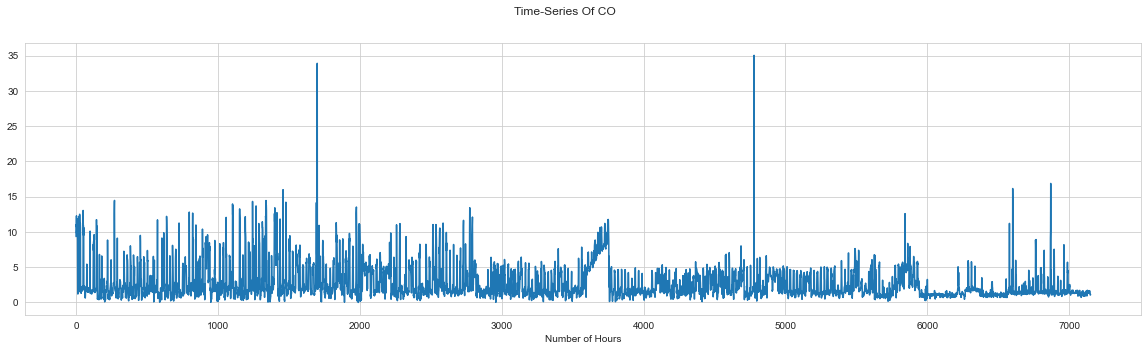

In [46]:
plt.figure(figsize=(20,5))
plt.plot(emmision_df['No_Of_Hours'],emmision_df["CO"])
plt.xlabel("Number of Hours")
plt.suptitle("Time-Series Of CO")
max(emmision_df["CO"])

119.91

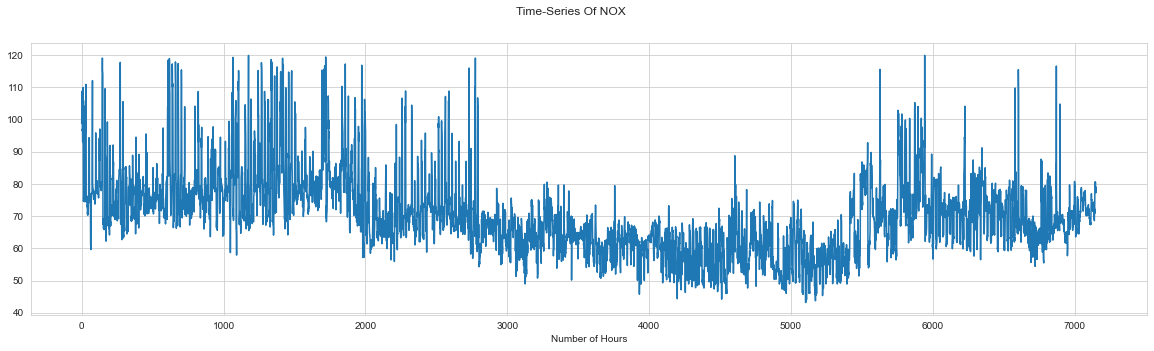

In [47]:
plt.figure(figsize=(20,5))
plt.plot(emmision_df['No_Of_Hours'],emmision_df["NOX"])
plt.xlabel("Number of Hours")
plt.suptitle("Time-Series Of NOX")
max(emmision_df["NOX"])

7.2 Approach :2

In our dataset we have 7153 row its not fitting that range year that's way i considerd 24 rows as 1 day then using pandas "groupby" function I ploted the Time- Seris graph.


Dates
01/01/2011    AxesSubplot(0.125,0.125;0.775x0.755)
Name: CO, dtype: object

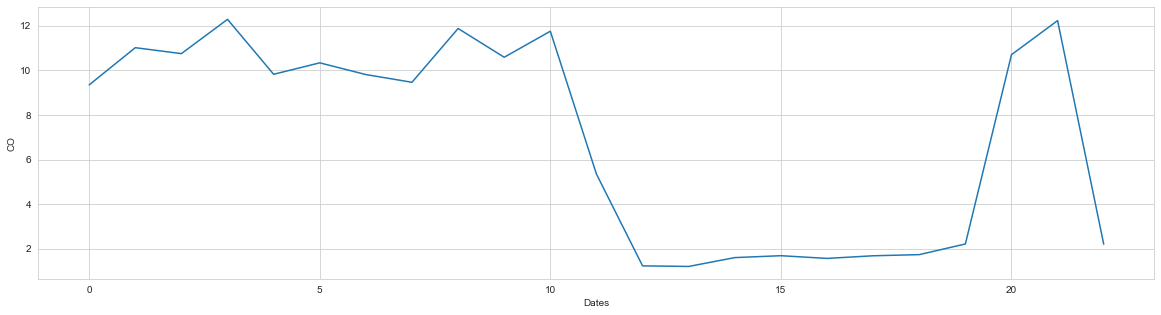

In [48]:
df = pd.read_csv("gt_2013_copy.csv")
df.rename(columns={'Unnamed: 11' : 'Dates'}, inplace=True)


for index, row in df.iterrows():
    value = row['Dates']
    if not pd.isnull(value):
        temp = value
    else:
        df.at[index, 'Dates'] = temp

val = 24  # for 1 days
df1 = df[:val-1]
plt.figure(figsize=(20,5))

df1.groupby('Dates')['CO'].plot(
xlabel = "Dates",
ylabel= "CO",
)


Dates
01/01/2011    AxesSubplot(0.125,0.125;0.775x0.755)
Name: NOX, dtype: object

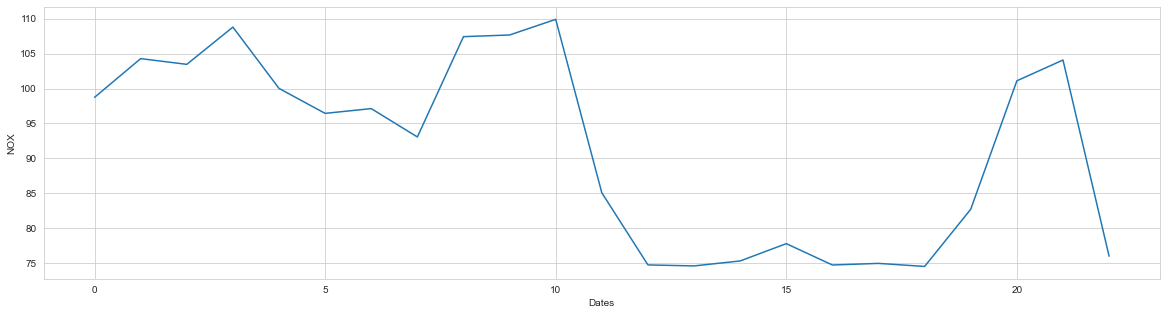

In [49]:
plt.figure(figsize=(20,5))

df1.groupby('Dates')['NOX'].plot(
xlabel = "Dates",
ylabel= "NOX")


So we can see that data of CO and NOX decrease around the range 10-20. 